In [17]:
"""
Transporter's Time : Vehicle Placement (or vehicle ) - Vehicle Indent (or vehicle acceptance)
Buyer's Time : Vehicle Unloading - Vehicle reached
Seller's Time : Vehicle Dispatch - Vehicle placement
"""

"\nTransporter's Time : Vehicle Placement (or vehicle ) - Vehicle Indent (or vehicle acceptance)\nBuyer's Time : Vehicle Unloading - Vehicle reached\nSeller's Time : Vehicle Dispatch - Vehicle placement\n"

In [50]:
df1 = pd.read_excel('l2_data.xlsx', 'L2 raw data')
df2 = pd.read_excel('l2_data.xlsx', 'PO level')
df2 = df2[df2['order_status'].str.lower() == 'completed']
# df2 = df2[['buyer_name', 'seller_name', 'seller_po_number', 'seller_po_status', 'transporter_type' , 'seller_po_creation_date', 'buyer_invoice_item_quantity', 'po_quantity', 'order_completion_percentage', 'o2d_']]
df1.head()

,sno,po_number,po_qty,seller_po_creation_date,category,dispatched_qty,origin,destination,dispatch_week,po_ts,nextbuy_order_indent_ts,nextbuy_vehicle_indent_ts,transporter_order_indent_ts,transporter_order_indent_acceptance_ts,vehicle_placement_ts,expected_date_of_vehicle_reporting,vehicle_reported_ts,vehicle_loaded_ts,vehicle_dispatched_ts,vehicle_reached_delivery_location_ts,payment_confirmation_received_by_ops,vehicle_unloaded_ts,nextbuy_order_indent_tat,nextbuy_vehicle_indent_tat,vehicle_placement_tat,vehicle_reported_tat,vehicle_dispatch_tat,vehicle_reported_actual_vs_expected,transporter_order_tat,vehicle_level_o2d,vehicle_level_o2dqty,O2D_
0,1,PO/25/MH/96,60.0,2024-04-12 13:50:32.410,RMC - Aluminium,29.709999,Raipur,Gandhinagar,April 2 Week,04-12-2024 19:20:32,4/12/2024 20:07:00,4/12/2024 20:07:00,4/12/2024 20:12:00,4/12/2024 20:45:00,4/13/2024 11:52:00,4/13/2024 23:59:59,4/13/2024 12:51:00,4/13/2024 15:57:00,4/13/2024 18:02:00,4/16/2024 9:55:00,4/16/2024 10:15:00,4/16/2024 13:30:00,0.032280,0.000012,0.656262,0.040984,0.215984,-0.464583,0.003484,0.945463,28.085899,0.945335
1,2,PO/25/MH/73,300.0,2024-04-10 13:23:40.897,RMC - Steel,39.230000,Raipur,Jalna,April 3 Week,04/10/2024 18:53:40,4/12/2024 20:40:00,4/12/2024 20:40:00,4/12/2024 20:55:00,4/12/2024 21:40:00,4/13/2024 18:22:00,4/14/2024 23:59:59,4/14/2024 7:26:00,4/15/2024 14:10:00,4/15/2024 15:32:00,4/18/2024 9:00:00,4/18/2024 10:12:00,4/19/2024 10:45:00,2.073854,0.000012,0.904178,0.544456,1.337512,-0.690278,0.010428,4.859950,190.656006,4.859954
2,3,PO/25/MH/73,300.0,2024-04-10 13:23:40.897,RMC - Steel,34.189999,Raipur,Jalna,April 3 Week,04/10/2024 18:53:40,4/12/2024 20:40:00,4/12/2024 20:40:00,4/12/2024 20:55:00,4/12/2024 21:40:00,4/13/2024 18:22:00,4/14/2024 23:59:59,4/14/2024 7:26:00,4/15/2024 16:37:00,4/15/2024 17:20:00,4/18/2024 12:00:00,4/18/2024 12:00:00,4/19/2024 11:30:00,2.073854,0.000012,0.904178,0.544456,1.412512,-0.690278,0.010428,4.934950,168.725998,4.934952
3,4,PO/25/MH/96,60.0,2024-04-12 13:50:32.410,RMC - Aluminium,29.260000,Raipur,Gandhinagar,April 3 Week,04-12-2024 19:20:32,4/12/2024 20:07:00,4/14/2024 21:50:00,4/12/2024 20:12:00,4/12/2024 20:45:00,4/15/2024 11:55:00,4/15/2024 23:59:59,4/15/2024 13:30:00,4/15/2024 17:55:00,4/15/2024 19:30:00,4/17/2024 20:00:00,4/18/2024 15:20:00,4/18/2024 16:30:00,0.032280,2.071539,0.586817,0.065984,0.250012,-0.437500,0.003484,3.006570,87.966301,3.006367
4,5,PO/25/HA/111,600.0,2024-04-16 12:24:35.313,RMC - Steel,25.129999,Durgapur,Sikendarabad,April 3 Week,04/16/2024 17:54:35,4/17/2024 16:23:00,4/17/2024 16:23:00,4/18/2024 10:20:00,4/18/2024 10:50:00,4/22/2024 11:00:00,4/19/2024 23:59:59,04/24/24 4:05:00,04/24/24 14:02:00,04/24/2024 22:15:00,4/26/2024 23:00:00,04/27/2024 16:15:00,04/28/2024 15:00:00,0.936412,0.000012,4.775706,1.711817,0.756956,4.170139,0.747928,8.180850,205.585007,8.180860


In [52]:
df = df1.merge(df2, left_on='po_number', right_on = 'seller_po_number', how = 'left')

# df['vehicle_unloaded_ts'] = pd.to_datetime(df['vehicle_unloaded_ts'], format='%m/%d/%y %H:%M:%S')
df = df.sort_values(by=['po_number', 'vehicle_unloaded_ts'])

## Renaming the category
df.loc[(df['category'] == 'RMX - Steel'), 'category'] = 'RMC - Steel'

## Ranking the order of the transport
df['order'] = df.groupby('po_number')[['vehicle_reached_delivery_location_ts']].rank(method='first')

## Route
df['route'] = df['origin'].str.lower() + '-' + df['destination'].str.lower()

### Month wise
df['po_ts'] = df['po_ts'].astype(str)
def safe_parse(date_str):
    try:
        return parser.parse(date_str)
    except (ValueError, TypeError):
        return pd.NaT

df['po_ts'] = df['po_ts'].apply(safe_parse)
df['Month'] = df['po_ts'].dt.strftime('%B')


### Total rounds 

po_count = df['po_number'].value_counts().reset_index()
po_count.rename(columns = {'count' : 'total_rounds'}, inplace = True)
df = df.merge(po_count, on = 'po_number')

print(df.shape)

(89, 52)


In [20]:
import pandas as pd
import numpy as np
from datetime import datetime

def convert_date_format(date_str):
    if pd.isna(date_str):
        return np.nan
    
    if isinstance(date_str, pd.Timestamp):
        return date_str.strftime("%m/%d/%Y %H:%M:%S")
    
    if isinstance(date_str, str):
        # Remove AM/PM if present
        date_str = date_str.replace(" AM", "").replace(" PM", "")
        
        # Add seconds if not present in the input string
        if len(date_str.split(':')) == 2:
            date_str += ":00"
        
        # Try different possible input formats for string inputs
        for fmt in ("%m/%d/%y %H:%M:%S", "%m/%d/%Y %H:%M:%S"):
            try:
                dt = datetime.strptime(date_str, fmt)
                return dt.strftime("%m/%d/%Y %H:%M:%S")
            except ValueError:
                pass
        
        # Handle formats with a single-digit month or day
        try:
            dt = datetime.strptime(date_str, "%m/%d/%Y %H:%M:%S")
            return dt.strftime("%m/%d/%Y %H:%M:%S")
        except ValueError:
            pass
        
    raise ValueError(f"Date format not recognized for '{date_str}'")

###############    Unloading Data     #############
df['vehicle_reached_delivery_location_ts'] = df['vehicle_reached_delivery_location_ts'].apply(lambda x: convert_date_format(x))
df['payment_confirmation_received_by_ops'] = df['payment_confirmation_received_by_ops'].apply(lambda x: convert_date_format(x))
df['vehicle_unloaded_ts'] = df['vehicle_unloaded_ts'].apply(lambda x: convert_date_format(x))

# Convert the date columns back to datetime
df['vehicle_reached_delivery_location_ts'] = pd.to_datetime(df['vehicle_reached_delivery_location_ts'])
df['payment_confirmation_received_by_ops'] = pd.to_datetime(df['payment_confirmation_received_by_ops'])
df['vehicle_unloaded_ts'] = pd.to_datetime(df['vehicle_unloaded_ts'])


df['unloading_time_total'] = (df['vehicle_unloaded_ts'] - df['vehicle_reached_delivery_location_ts']).dt.total_seconds() / (3600 * 24)
df['reached_to_payment_tat'] = (df['payment_confirmation_received_by_ops'] - df['vehicle_reached_delivery_location_ts']).dt.total_seconds() / (3600 * 24)
df['payment_to_unloading_tat'] = (df['vehicle_unloaded_ts'] - df['payment_confirmation_received_by_ops']).dt.total_seconds() / (3600 * 24)



#############    Seller Level   ##########

df['vehicle_dispatched_ts'] = df['vehicle_dispatched_ts'].apply(lambda x: convert_date_format(x))
df['vehicle_reported_ts'] = df['vehicle_reported_ts'].apply(lambda x: convert_date_format(x))
df['vehicle_loaded_ts'] = df['vehicle_loaded_ts'].apply(lambda x: convert_date_format(x))

# Convert the date columns back to datetime
df['vehicle_dispatched_ts'] = pd.to_datetime(df['vehicle_dispatched_ts'])
df['vehicle_reported_ts'] = pd.to_datetime(df['vehicle_reported_ts'])
df['vehicle_loaded_ts'] = pd.to_datetime(df['vehicle_loaded_ts'])


df['seller_total_time'] = (df['vehicle_dispatched_ts'] - df['vehicle_reported_ts']).dt.total_seconds() / (3600 * 24)
df['vehicle_reported_to_load_tat'] = (df['vehicle_loaded_ts'] - df['vehicle_reported_ts']).dt.total_seconds() / (3600 * 24)
df['vehicle_loaded_to_dispatch_tat'] = (df['vehicle_dispatched_ts'] - df['vehicle_loaded_ts']).dt.total_seconds() / (3600 * 24)

###########   Transporter Level    ########33

df['nextbuy_vehicle_indent_ts'] = df['nextbuy_vehicle_indent_ts'].apply(lambda x: convert_date_format(x))
df['vehicle_placement_ts'] = df['vehicle_placement_ts'].apply(lambda x: convert_date_format(x))
df['vehicle_unloaded_ts'] = df['vehicle_unloaded_ts'].apply(lambda x: convert_date_format(x))
df['vehicle_reported_ts'] = df['vehicle_reported_ts'].apply(lambda x: convert_date_format(x))
df['vehicle_dispatched_ts'] = df['vehicle_dispatched_ts'].apply(lambda x: convert_date_format(x))
df['vehicle_reached_delivery_location_ts'] = df['vehicle_reached_delivery_location_ts'].apply(lambda x: convert_date_format(x))


df['transporter_time'] = (pd.to_datetime(df['vehicle_placement_ts']) - pd.to_datetime(df['nextbuy_vehicle_indent_ts'])).dt.total_seconds() / (3600 * 24)
df['transporter_indent_to_accept_tat'] = (pd.to_datetime(df['transporter_order_indent_acceptance_ts']) - pd.to_datetime(df['transporter_order_indent_ts'])).dt.total_seconds() / (3600 * 24)
df['transporter_accept_to_placement_tat'] = (pd.to_datetime(df['vehicle_reported_ts']) - pd.to_datetime(df['transporter_order_indent_acceptance_ts'])).dt.total_seconds() / (3600 * 24)





route = df[['route']]
df = pd.get_dummies(df, columns=['route'], prefix='route')
df = df.replace({True: 1, False: 0})
df = pd.concat([df, route], axis=1)

# df[df['delay_in_unloading'] >= 1].head()


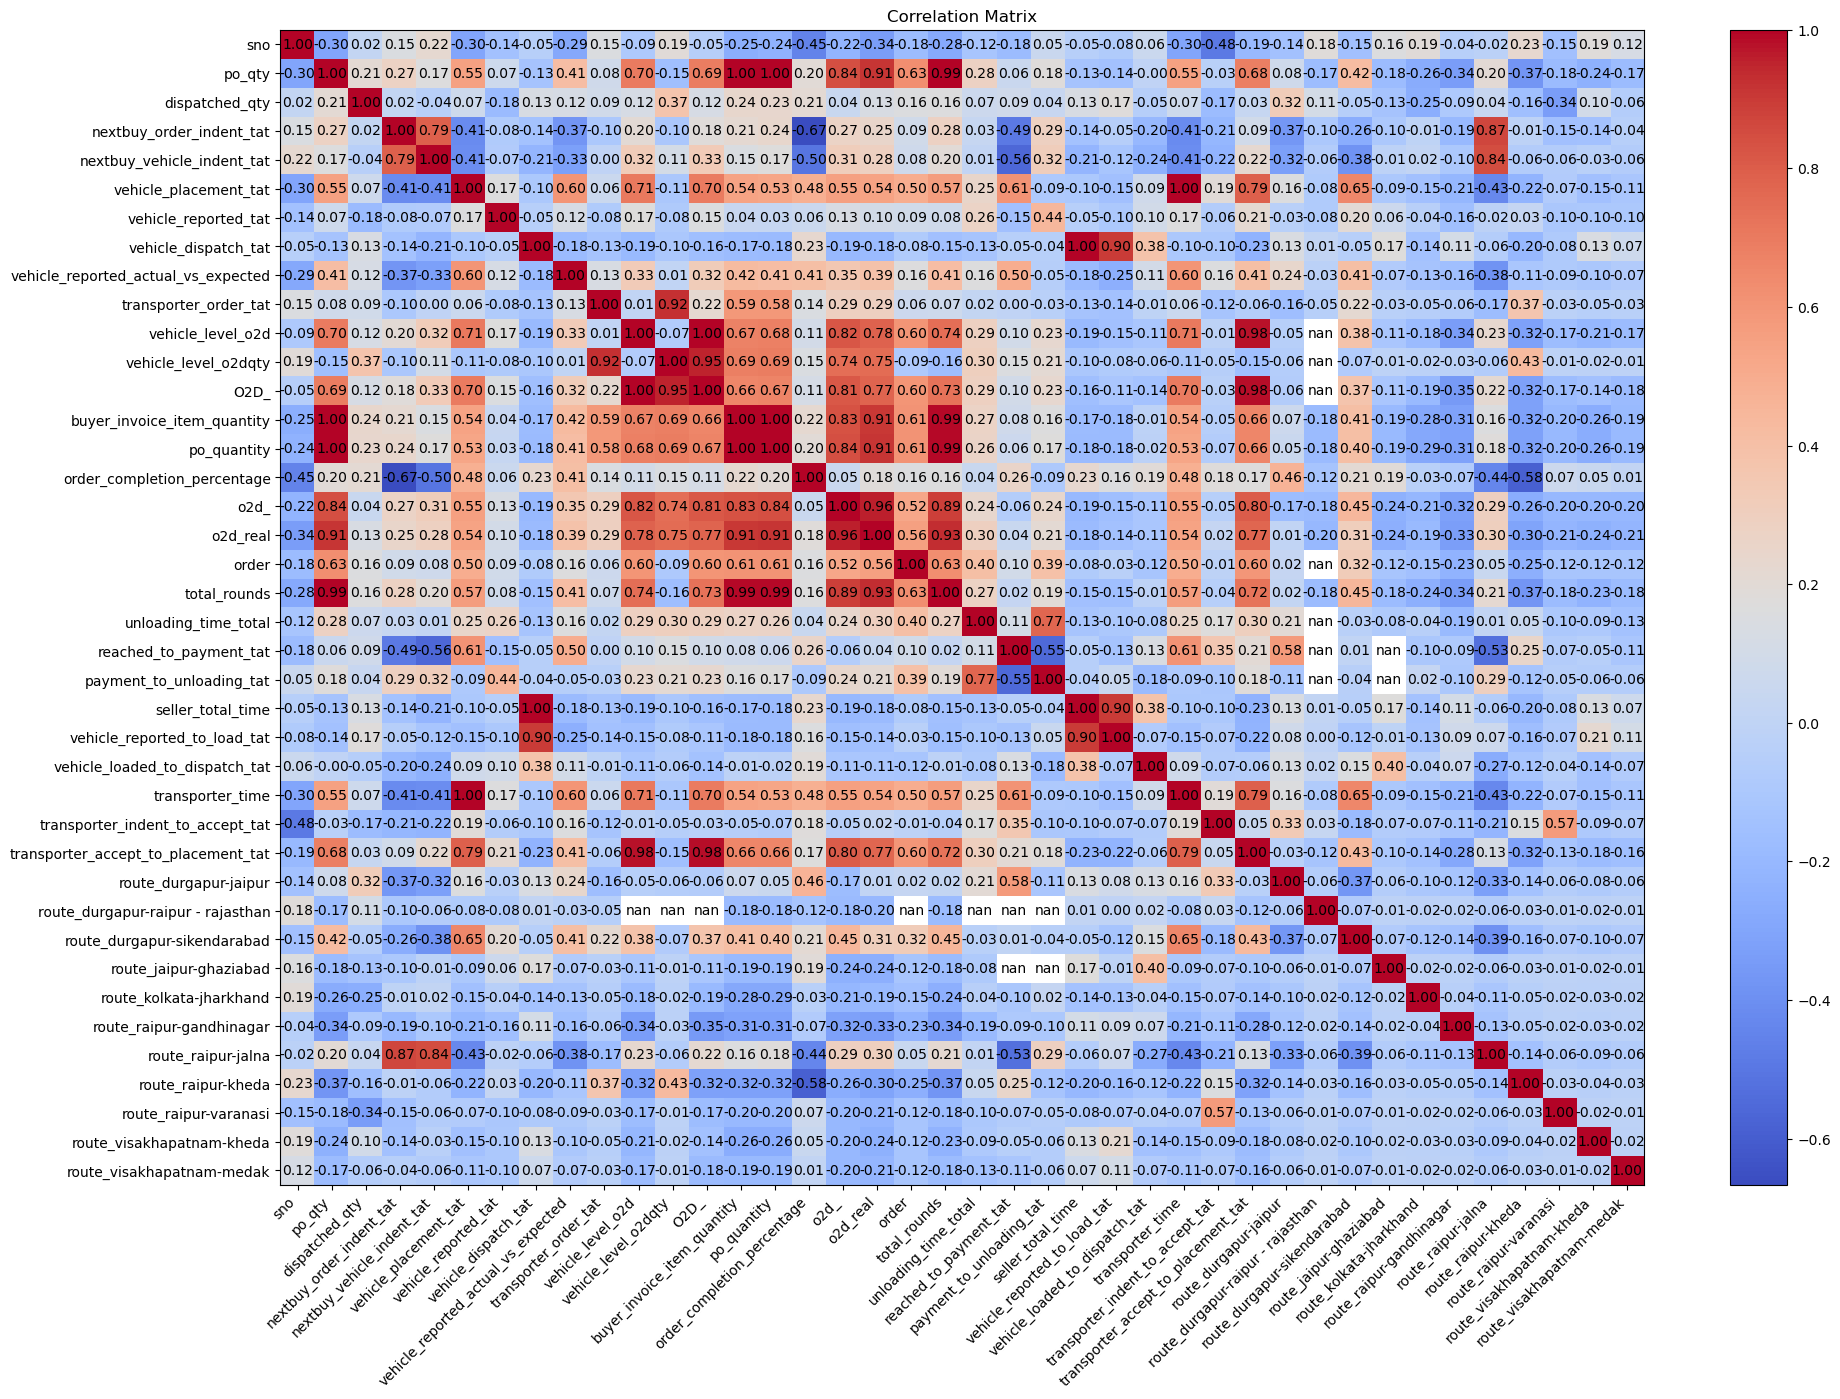

In [24]:
numeric_cols = df.select_dtypes(include=['number']).columns

# Calculate the correlation matrix
correlation_matrix = df[numeric_cols].corr()

# Plotting the heatmap with correlation values
plt.figure(figsize=(22, 15))
heatmap = plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none', aspect='auto')

# Adding color bar
plt.colorbar(heatmap)

# Adding labels
plt.xticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45, ha='right')
plt.yticks(np.arange(len(correlation_matrix.index)), correlation_matrix.index)

# Adding correlation values
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.index)):
        plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black')

plt.title('Correlation Matrix')
plt.show()

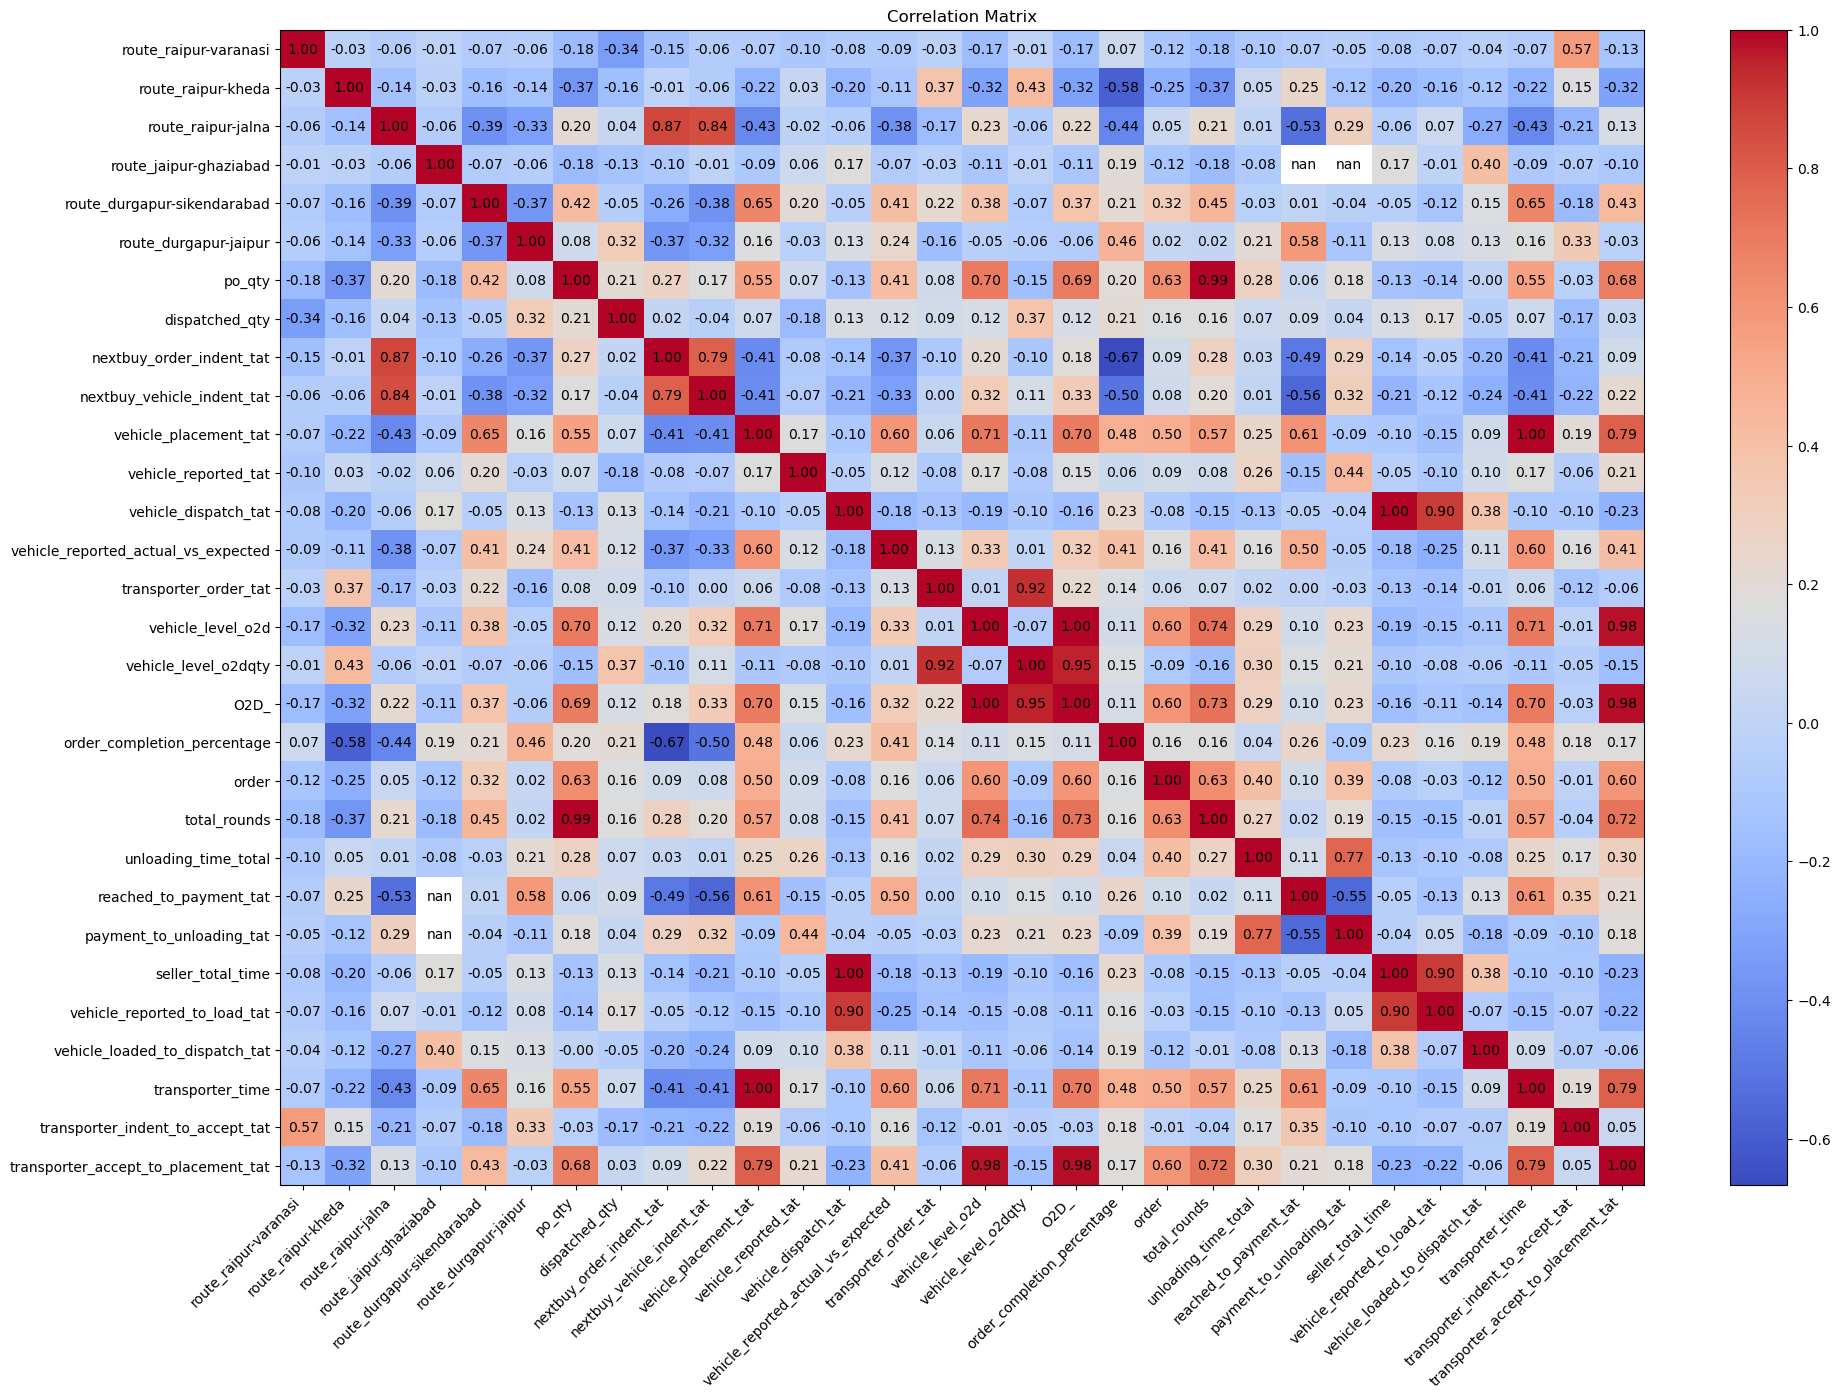

In [29]:
df3 =df[['route_raipur-varanasi', 'route_raipur-kheda', 'route_raipur-jalna', 'route_jaipur-ghaziabad', 'route_durgapur-sikendarabad', 
'route_durgapur-jaipur', 'po_qty', 'seller_po_creation_date_x', 'category',
       'dispatched_qty', 'origin', 'destination', 'dispatch_week', 'po_ts',
       'nextbuy_order_indent_ts', 'nextbuy_vehicle_indent_ts',
       'transporter_order_indent_ts', 'transporter_order_indent_acceptance_ts',
       'vehicle_placement_ts', 'expected_date_of_vehicle_reporting',
       'vehicle_reported_ts', 'vehicle_loaded_ts', 'vehicle_dispatched_ts',
       'vehicle_reached_delivery_location_ts',
       'payment_confirmation_received_by_ops', 'vehicle_unloaded_ts',
       'nextbuy_order_indent_tat', 'nextbuy_vehicle_indent_tat',
       'vehicle_placement_tat', 'vehicle_reported_tat', 'vehicle_dispatch_tat',
       'vehicle_reported_actual_vs_expected', 'transporter_order_tat',
       'vehicle_level_o2d', 'vehicle_level_o2dqty', 'O2D_', 'buyer_name',
       'seller_name', 'seller_po_number', 'seller_po_status',
       'order_completion_percentage', 'order_status',
       'O2D_Bucket', 'Tons_Bucket', 'order', 'Month', 'total_rounds',
       'unloading_time_total', 'reached_to_payment_tat',
       'payment_to_unloading_tat', 'seller_total_time',
       'vehicle_reported_to_load_tat', 'vehicle_loaded_to_dispatch_tat',
       'transporter_time', 'transporter_indent_to_accept_tat',
       'transporter_accept_to_placement_tat']]

numeric_cols = df3.select_dtypes(include=['number']).columns

# Calculate the correlation matrix
correlation_matrix = df3[numeric_cols].corr()

# Plotting the heatmap with correlation values
plt.figure(figsize=(22, 15))
heatmap = plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none', aspect='auto')

# Adding color bar
plt.colorbar(heatmap)

# Adding labels
plt.xticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45, ha='right')
plt.yticks(np.arange(len(correlation_matrix.index)), correlation_matrix.index)

# Adding correlation values
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.index)):
        plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black')

plt.title('Correlation Matrix')
plt.show()

In [31]:
df3.head()

,route_raipur-varanasi,route_raipur-kheda,route_raipur-jalna,route_jaipur-ghaziabad,route_durgapur-sikendarabad,route_durgapur-jaipur,po_qty,seller_po_creation_date_x,category,dispatched_qty,origin,destination,dispatch_week,po_ts,nextbuy_order_indent_ts,nextbuy_vehicle_indent_ts,transporter_order_indent_ts,transporter_order_indent_acceptance_ts,vehicle_placement_ts,expected_date_of_vehicle_reporting,vehicle_reported_ts,vehicle_loaded_ts,vehicle_dispatched_ts,vehicle_reached_delivery_location_ts,payment_confirmation_received_by_ops,vehicle_unloaded_ts,nextbuy_order_indent_tat,nextbuy_vehicle_indent_tat,vehicle_placement_tat,vehicle_reported_tat,vehicle_dispatch_tat,vehicle_reported_actual_vs_expected,transporter_order_tat,vehicle_level_o2d,vehicle_level_o2dqty,O2D_,buyer_name,seller_name,seller_po_number,seller_po_status,order_completion_percentage,order_status,O2D_Bucket,Tons_Bucket,order,Month,total_rounds,unloading_time_total,reached_to_payment_tat,payment_to_unloading_tat,seller_total_time,vehicle_reported_to_load_tat,vehicle_loaded_to_dispatch_tat,transporter_time,transporter_indent_to_accept_tat,transporter_accept_to_placement_tat
0,0,0,0,0,1,0,600.0,2024-04-16 12:24:35.313,RMC - Steel,30.000000,Durgapur,Sikendarabad,April 4 Week,2024-04-16 17:54:35,4/17/2024 16:23:00,04/17/2024 16:23:00,4/18/2024 10:20:00,4/18/2024 10:50:00,04/24/2024 07:31:00,4/19/2024 23:59:59,04/24/2024 04:00:00,2024-04-24 14:25:00,04/24/2024 22:00:00,04/26/2024 11:00:00,2024-04-27 14:14:00,04/27/2024 16:00:00,0.936412,0.000012,6.630567,-0.146516,0.750012,4.166667,0.747928,8.17043,245.113007,8.170434,HANNU STEEL PRIVATE LIMITED,SUMANGAL ISPAT PVT LTD,PO/25/HA/111,Accepted,100.0,Completed,6+ days,400+,1.0,April,17,1.208333,1.134722,0.073611,0.750000,0.434028,0.315972,6.630556,0.020833,5.715278
1,0,0,0,0,1,0,600.0,2024-04-16 12:24:35.313,RMC - Steel,25.129999,Durgapur,Sikendarabad,April 3 Week,2024-04-16 17:54:35,4/17/2024 16:23:00,04/17/2024 16:23:00,4/18/2024 10:20:00,4/18/2024 10:50:00,04/22/2024 11:00:00,4/19/2024 23:59:59,04/24/2024 04:05:00,2024-04-24 14:02:00,04/24/2024 22:15:00,04/26/2024 23:00:00,2024-04-27 16:15:00,04/28/2024 15:00:00,0.936412,0.000012,4.775706,1.711817,0.756956,4.170139,0.747928,8.18085,205.585007,8.180860,HANNU STEEL PRIVATE LIMITED,SUMANGAL ISPAT PVT LTD,PO/25/HA/111,Accepted,100.0,Completed,6+ days,400+,16.0,April,17,1.666667,0.718750,0.947917,0.756944,0.414583,0.342361,4.775694,0.020833,5.718750
2,0,0,0,0,1,0,600.0,2024-04-16 12:24:35.313,RMC - Steel,42.040001,Durgapur,Sikendarabad,May 1 Week,2024-04-16 17:54:35,4/17/2024 16:23:00,04/17/2024 16:23:00,4/18/2024 10:20:00,4/18/2024 10:50:00,04/29/2024 09:03:00,4/20/2024 23:59:59,04/29/2024 05:00:00,2024-04-29 17:05:00,04/29/2024 21:00:00,05/02/2024 09:00:00,NaT,05/02/2024 13:00:00,0.936412,0.000012,11.694456,-0.168738,0.666678,8.208333,0.747928,13.12880,551.932983,13.128758,HANNU STEEL PRIVATE LIMITED,SUMANGAL ISPAT PVT LTD,PO/25/HA/111,Accepted,100.0,Completed,6+ days,400+,17.0,April,17,0.166667,NaN,NaN,0.666667,0.503472,0.163194,11.694444,0.020833,10.756944
3,0,0,0,0,1,0,600.0,2024-04-16 12:24:35.313,RMC - Steel,41.520000,Durgapur,Sikendarabad,May 1 Week,2024-04-16 17:54:35,4/17/2024 16:23:00,04/17/2024 16:23:00,4/18/2024 10:20:00,4/18/2024 10:50:00,04/28/2024 22:12:00,4/20/2024 23:59:59,04/29/2024 05:00:00,2024-04-29 16:29:00,04/29/2024 22:00:00,05/02/2024 09:28:00,2024-05-02 13:01:00,05/02/2024 13:30:24,0.936412,0.000012,11.242373,0.283345,0.708345,8.208333,0.747928,13.17040,546.835999,13.170424,HANNU STEEL PRIVATE LIMITED,SUMANGAL ISPAT PVT LTD,PO/25/HA/111,Accepted,100.0,Completed,6+ days,400+,2.0,April,17,0.168333,0.147917,0.020417,0.708333,0.478472,0.229861,11.242361,0.020833,10.756944
4,0,0,0,0,1,0,600.0,2024-04-16 12:24:35.313,RMC - Steel,33.790001,Durgapur,Sikendarabad,April 4 Week,2024-04-16 17:54:35,4/17/2024 16:23:00,04/17/2024 16:23:00,4/18/2024 10:20:00,4/18/2024 10:50:00,04/26/2024 15:00:00,4/20/2024 23:59:59,04/27/2024 05:30:00,2024-04-27 11:37:00,04/27/202

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

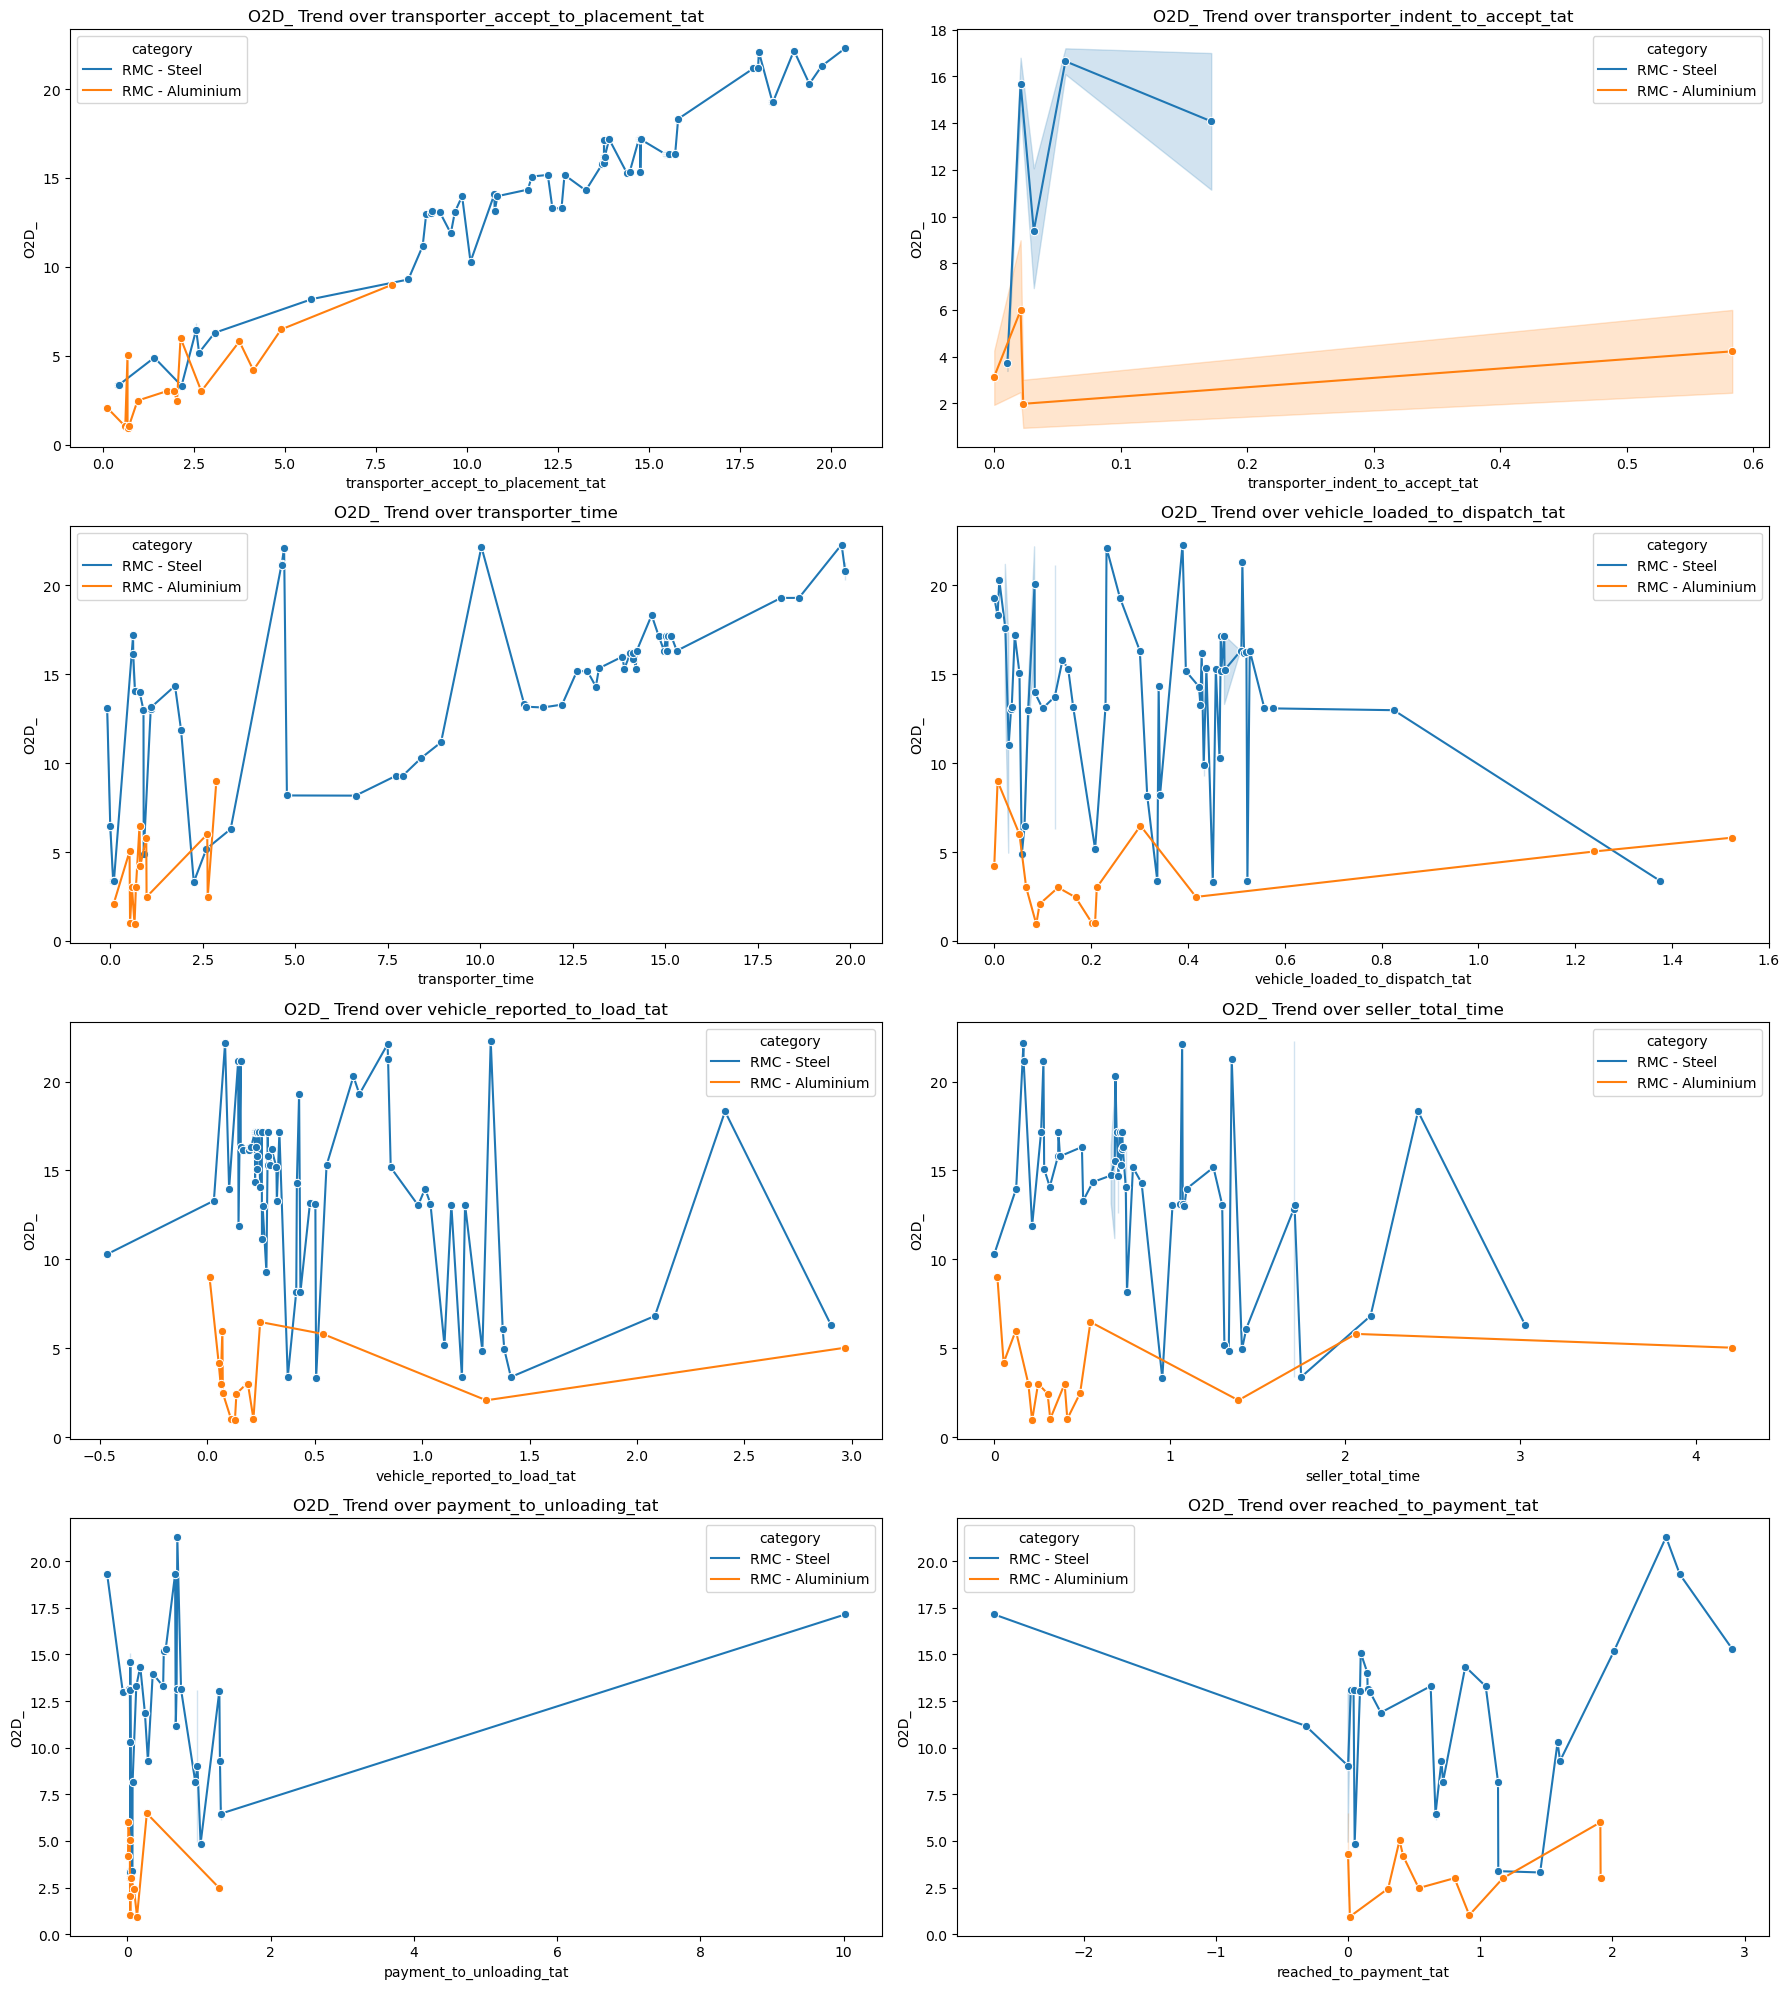

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(4, 2, figsize=(18, 20))

# Plot data on each subplot
sns.lineplot(x='transporter_accept_to_placement_tat', y='O2D_', hue='category', data=df3, ax=axes[0, 0], marker='o')
axes[0, 0].set_title('O2D_ Trend over transporter_accept_to_placement_tat')

sns.lineplot(x='transporter_indent_to_accept_tat', y='O2D_', hue='category', data=df3, ax=axes[0, 1], marker='o')
axes[0, 1].set_title('O2D_ Trend over transporter_indent_to_accept_tat')

sns.lineplot(x='transporter_time', y='O2D_', hue='category', data=df3, ax=axes[1, 0], marker='o')
axes[1, 0].set_title('O2D_ Trend over transporter_time')

sns.lineplot(x='vehicle_loaded_to_dispatch_tat', y='O2D_', hue='category', data=df3, ax=axes[1, 1], marker='o')
axes[1, 1].set_title('O2D_ Trend over vehicle_loaded_to_dispatch_tat')

sns.lineplot(x='vehicle_reported_to_load_tat', y='O2D_', hue='category', data=df3, ax=axes[2, 0], marker='o')
axes[2, 0].set_title('O2D_ Trend over vehicle_reported_to_load_tat')

sns.lineplot(x='seller_total_time', y='O2D_', hue='category', data=df3, ax=axes[2, 1], marker='o')
axes[2, 1].set_title('O2D_ Trend over seller_total_time')

sns.lineplot(x='payment_to_unloading_tat', y='O2D_', hue='category', data=df3, ax=axes[3, 0], marker='o')
axes[3, 0].set_title('O2D_ Trend over payment_to_unloading_tat')

sns.lineplot(x='reached_to_payment_tat', y='O2D_', hue='category', data=df3, ax=axes[3, 1], marker='o')
axes[3, 1].set_title('O2D_ Trend over reached_to_payment_tat')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show();


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

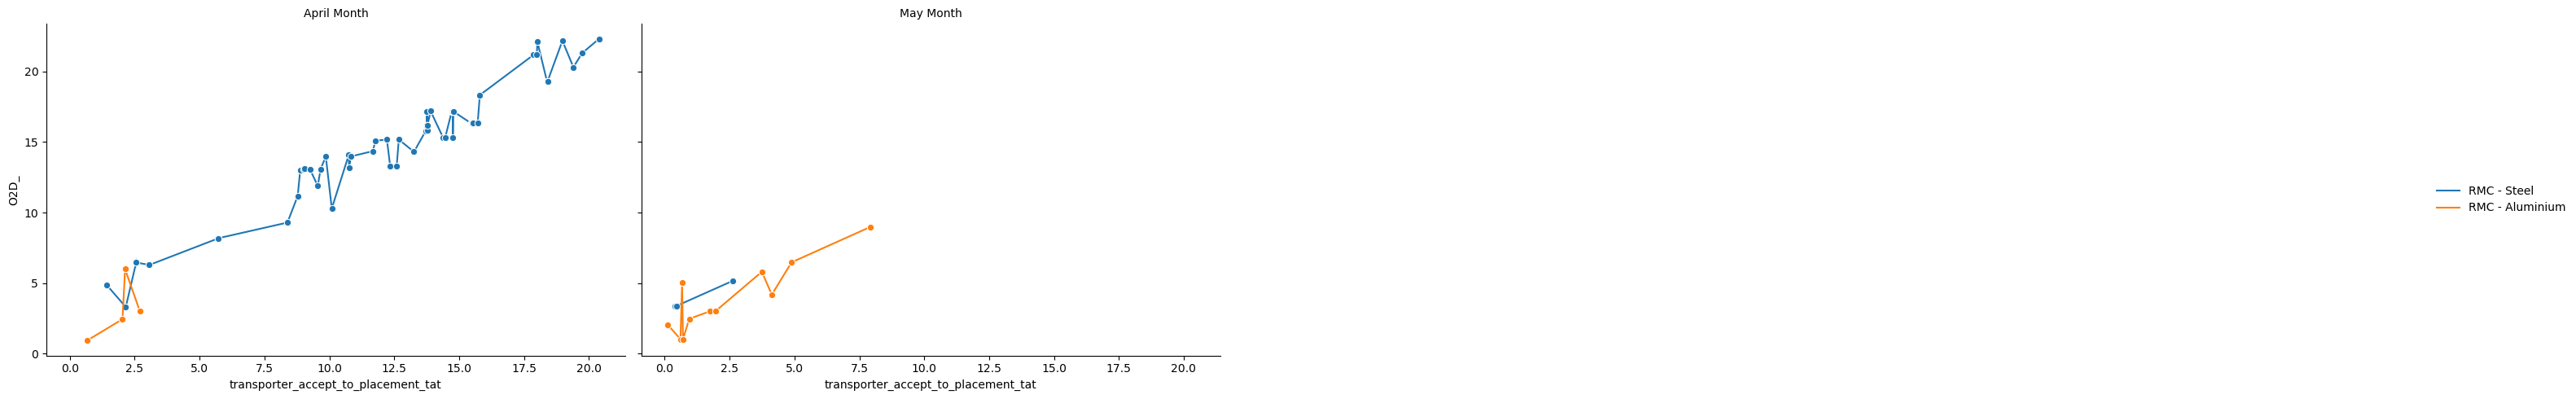

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a grid of plots for each month
g = sns.FacetGrid(df3, col="Month", col_wrap=4, height=5, aspect=1.5)

# Define a function to plot the data
def lineplot(x, y, **kwargs):
    sns.lineplot(x=x, y=y, hue='category', data=kwargs['data'], marker='o')

# Plot each metric in the grid
g.map_dataframe(lineplot, x='transporter_accept_to_placement_tat', y='O2D_')
g.set_titles(col_template="{col_name} Month")
g.set_axis_labels("transporter_accept_to_placement_tat", "O2D_")
g.add_legend()

plt.show()


In [42]:
df3[df3['transporter_accept_to_placement_tat'] == df3['transporter_accept_to_placement_tat'].max()]

,route_raipur-varanasi,route_raipur-kheda,route_raipur-jalna,route_jaipur-ghaziabad,route_durgapur-sikendarabad,route_durgapur-jaipur,po_qty,seller_po_creation_date_x,category,dispatched_qty,origin,destination,dispatch_week,po_ts,nextbuy_order_indent_ts,nextbuy_vehicle_indent_ts,transporter_order_indent_ts,transporter_order_indent_acceptance_ts,vehicle_placement_ts,expected_date_of_vehicle_reporting,vehicle_reported_ts,vehicle_loaded_ts,vehicle_dispatched_ts,vehicle_reached_delivery_location_ts,payment_confirmation_received_by_ops,vehicle_unloaded_ts,nextbuy_order_indent_tat,nextbuy_vehicle_indent_tat,vehicle_placement_tat,vehicle_reported_tat,vehicle_dispatch_tat,vehicle_reported_actual_vs_expected,transporter_order_tat,vehicle_level_o2d,vehicle_level_o2dqty,O2D_,buyer_name,seller_name,seller_po_number,seller_po_status,order_completion_percentage,order_status,O2D_Bucket,Tons_Bucket,order,Month,total_rounds,unloading_time_total,reached_to_payment_tat,payment_to_unloading_tat,seller_total_time,vehicle_reported_to_load_tat,vehicle_loaded_to_dispatch_tat,transporter_time,transporter_indent_to_accept_tat,transporter_accept_to_placement_tat
38,0,0,0,0,0,1,500.0,2024-04-18 09:31:10.957,RMC - Steel,40.610001,Durgapur,Jaipur,May 2 week,2024-04-18 15:01:10,4/18/2024 15:12:00,04/18/2024 15:12:00,4/18/2024 15:40:00,4/18/2024 19:47:00,05/08/2024 09:41:00,5/9/2024 2:00:00,05/09/2024 05:00:00,2024-05-10 12:40:00,05/10/2024 22:00:00,05/13/2024 14:30:00,NaT,05/15/2024 16:30:00,0.007535,0.000012,19.77015,0.804873,1.708345,0.124988,0.019456,22.290899,905.231995,22.290864,M/S SHREE GANPATI TRADERS,SUMANGAL ISPAT PVT LTD,PO/25/HA/130,Accepted,101.654,Completed,6+ days,400+,13.0,April,14,2.083333,NaN,NaN,1.708333,1.319444,0.388889,19.770139,0.171528,20.384028


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

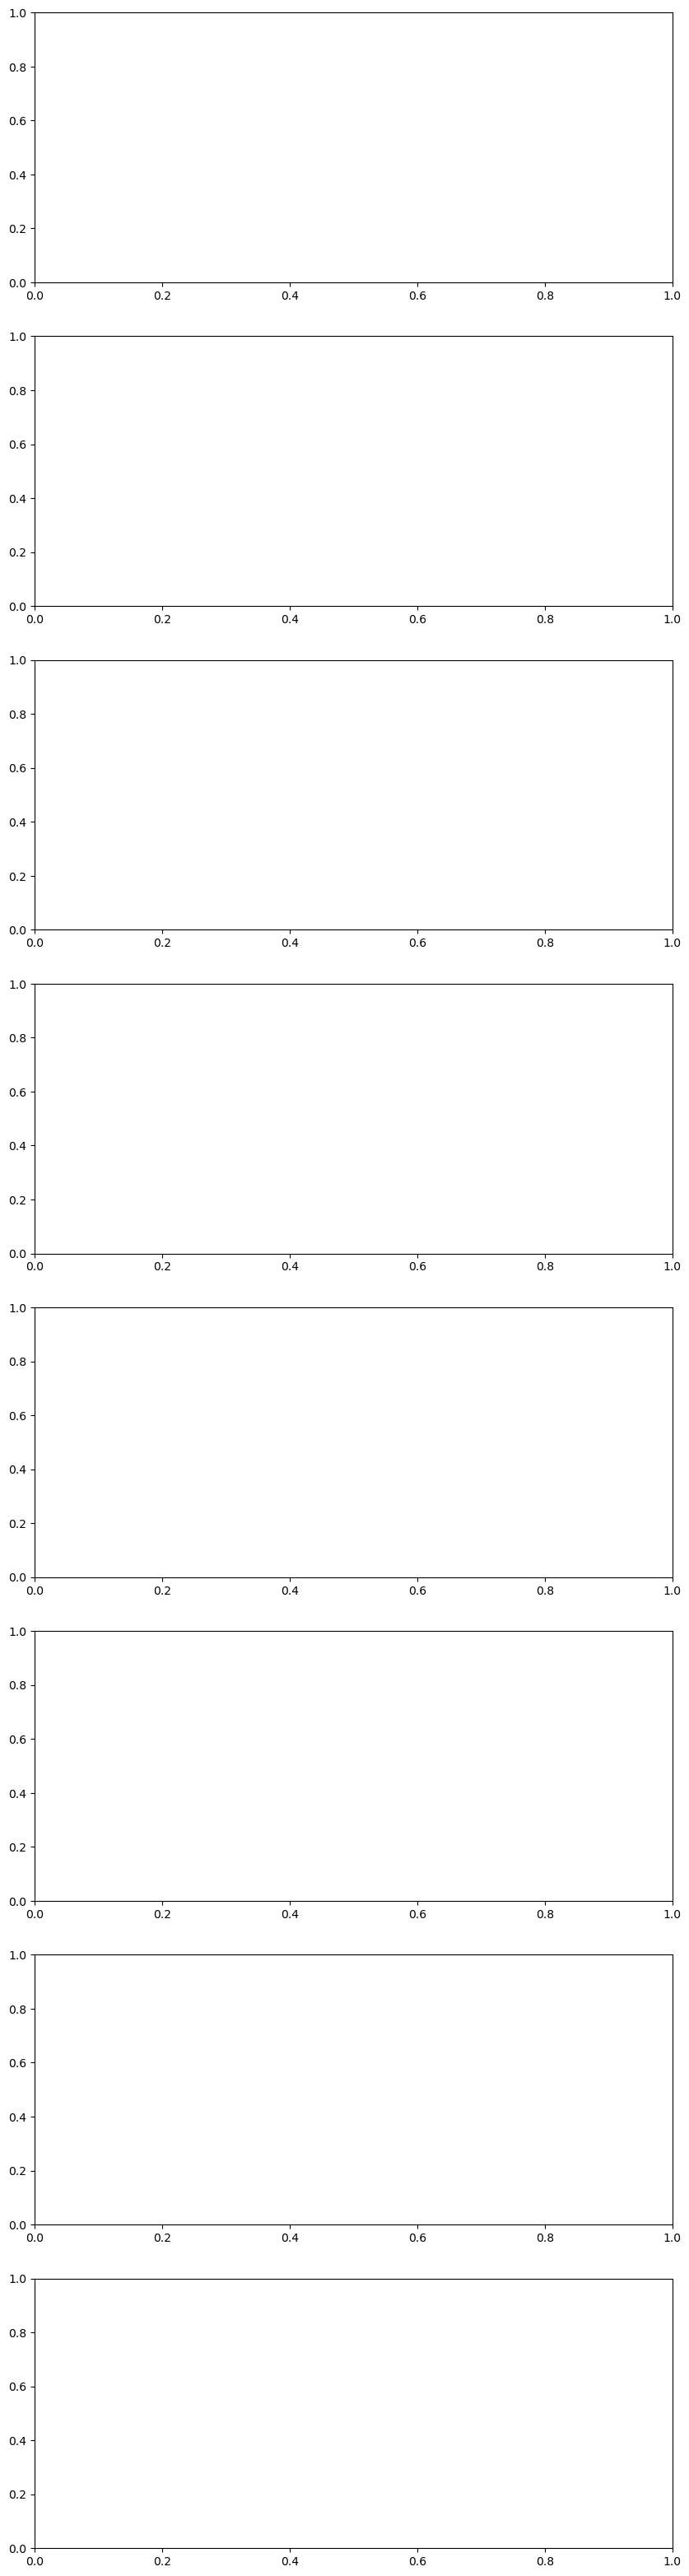

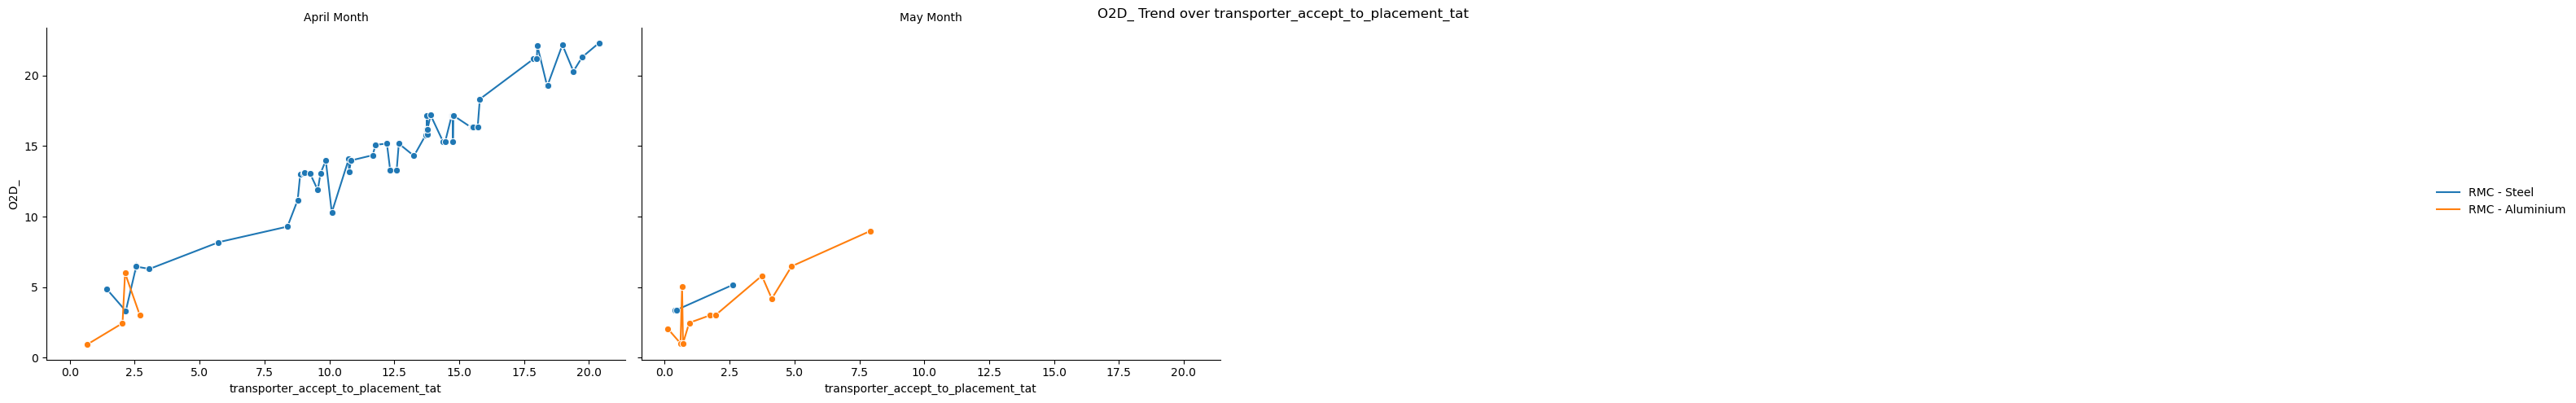

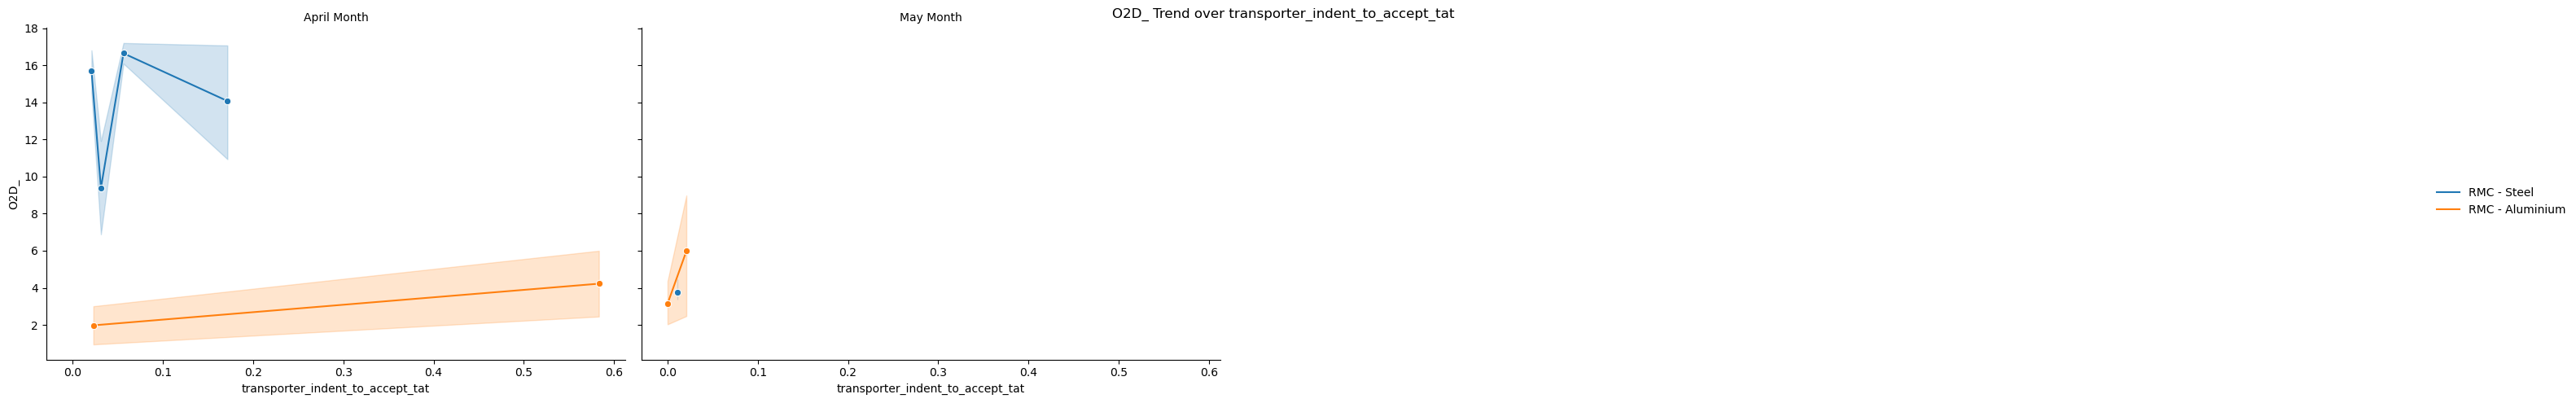

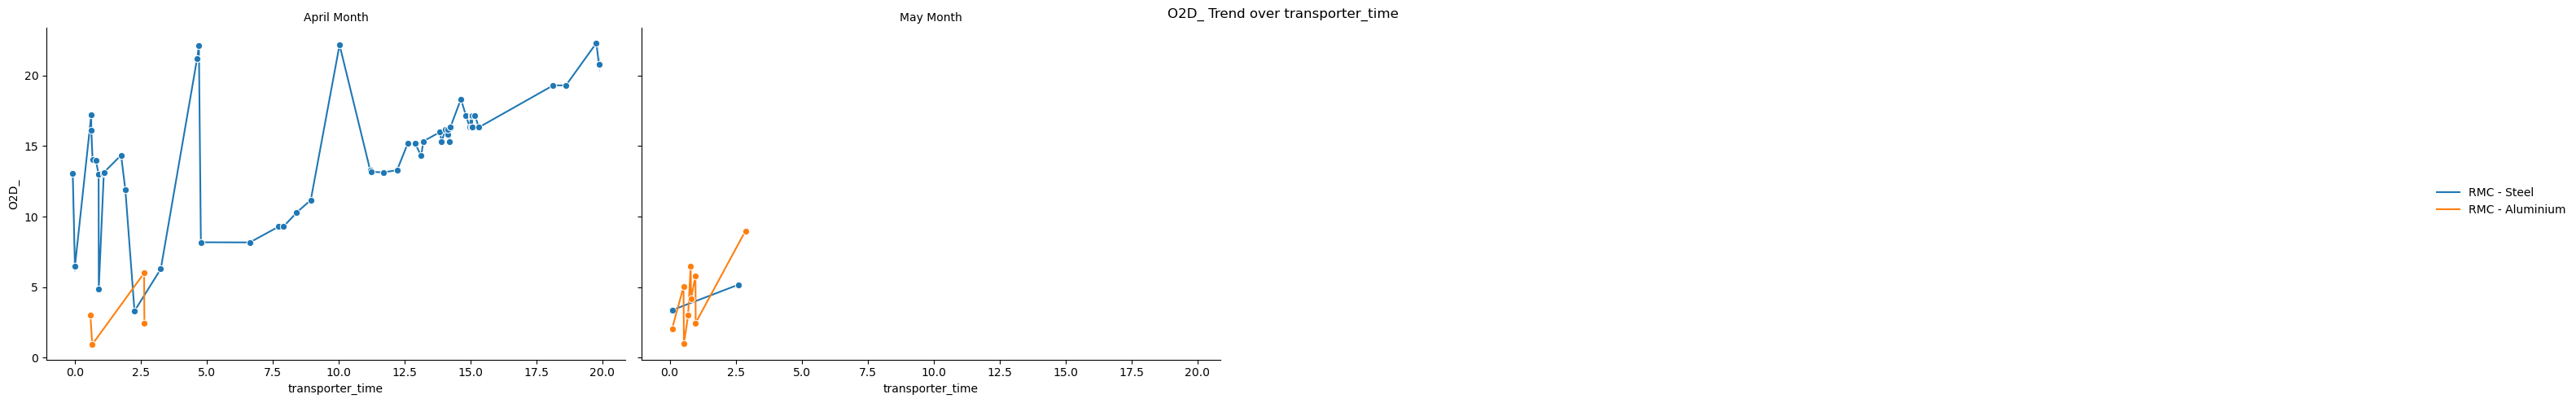

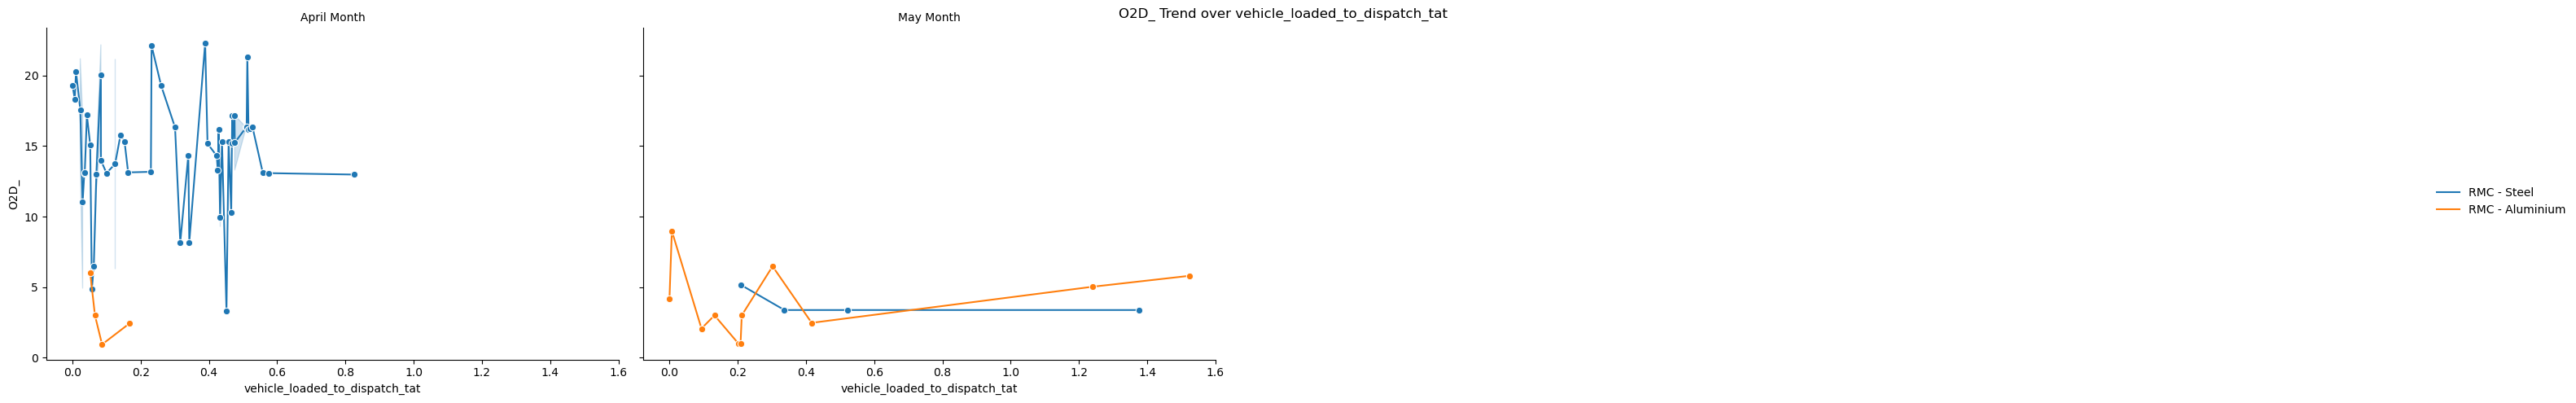

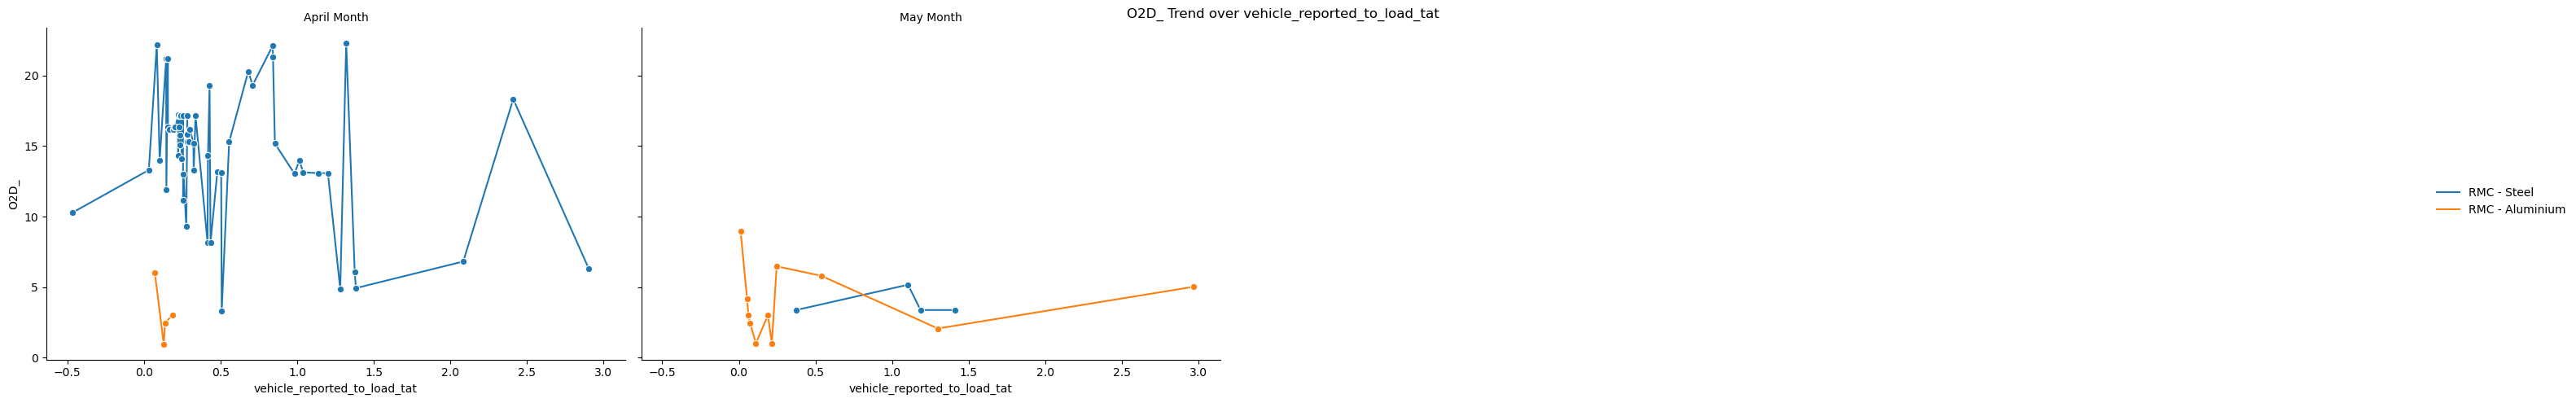

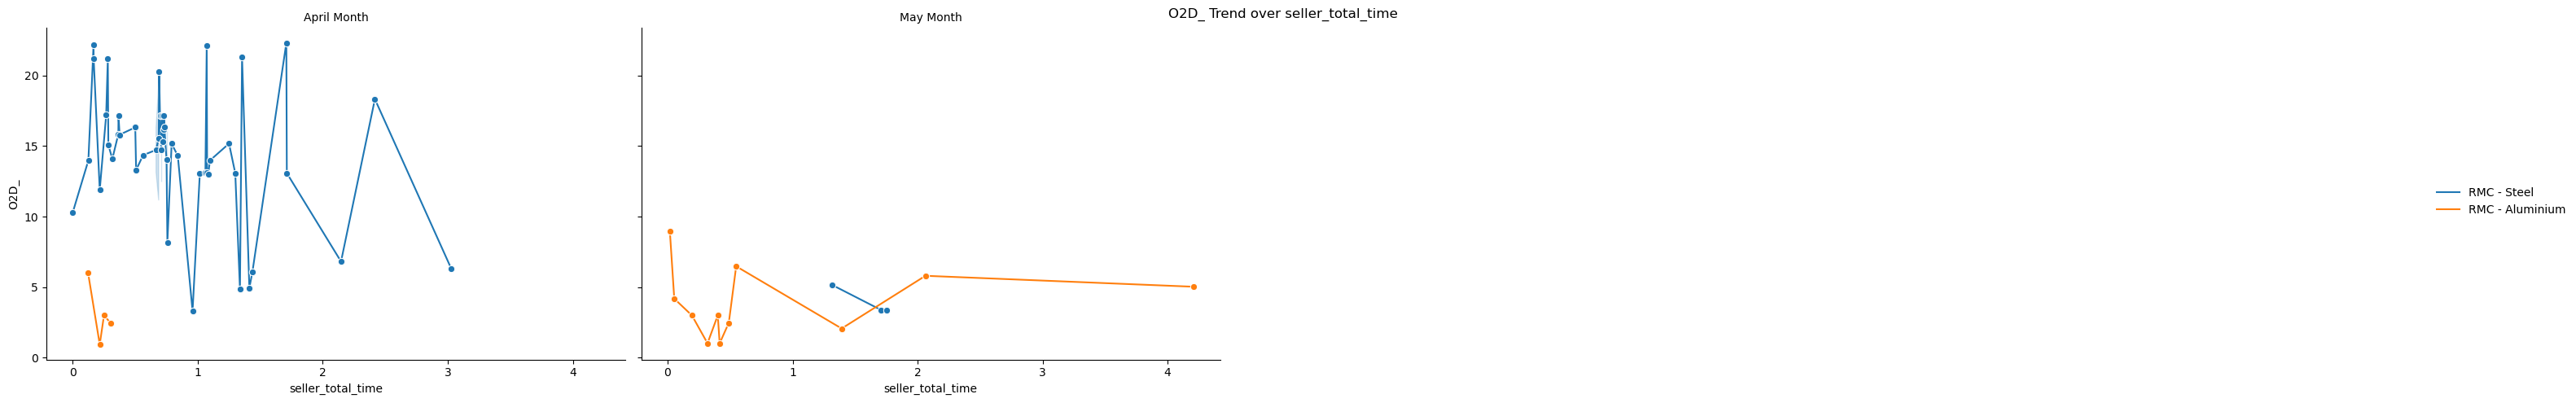

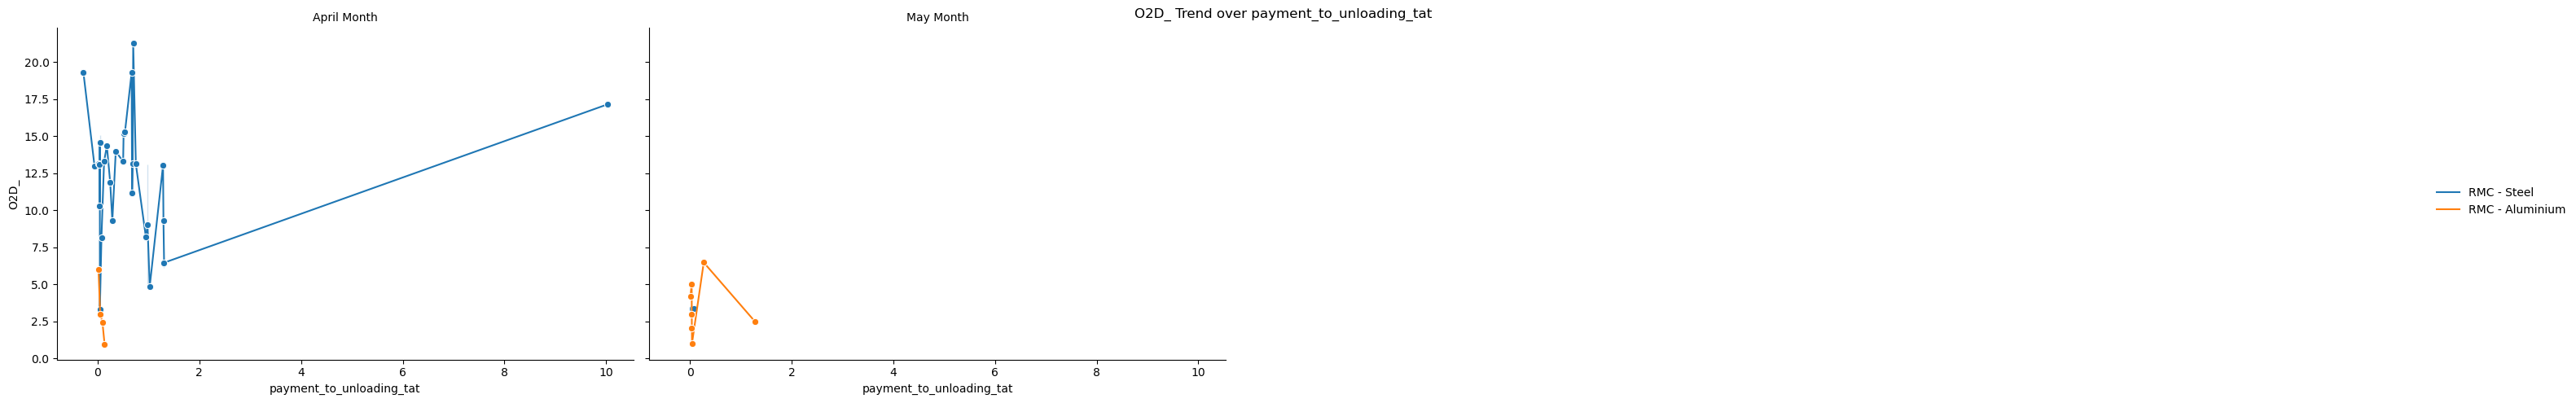

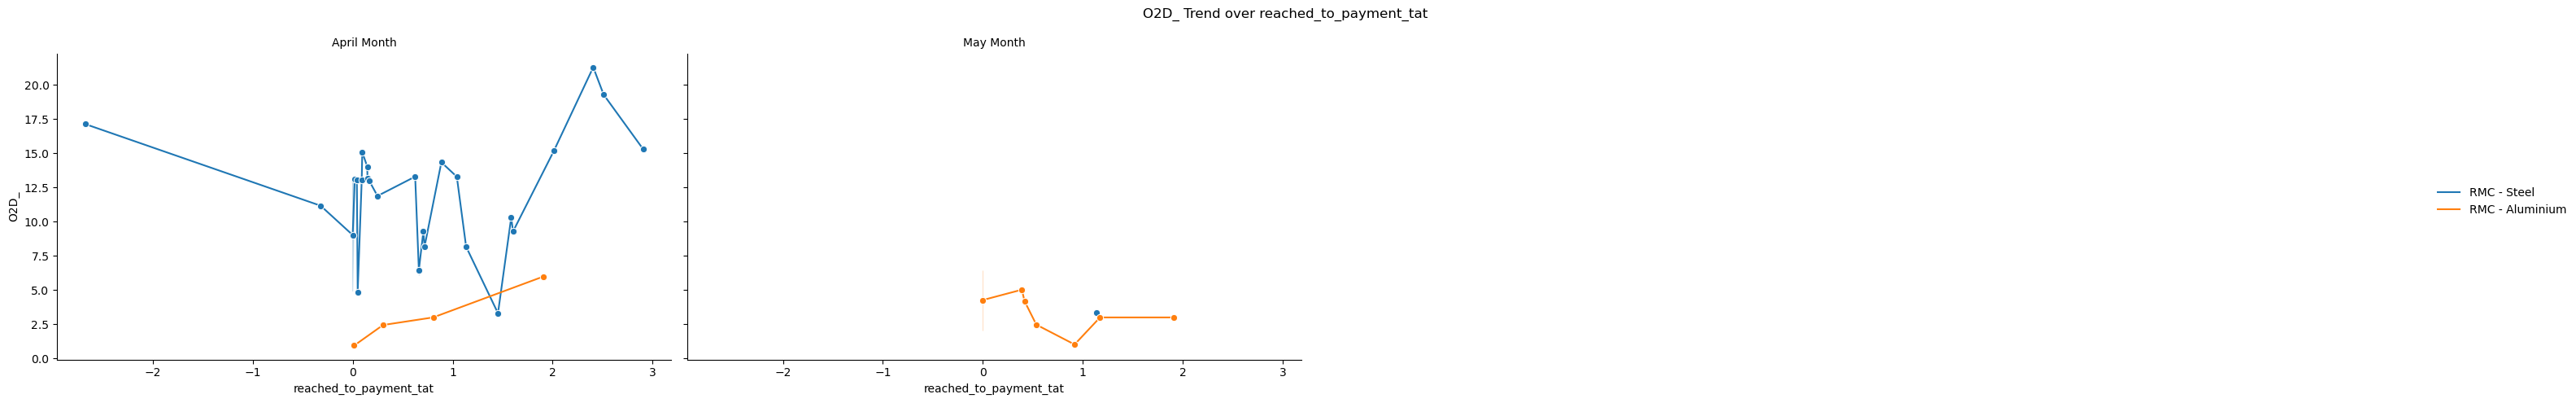

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

metrics = [
    'transporter_accept_to_placement_tat', 'transporter_indent_to_accept_tat',
    'transporter_time', 'vehicle_loaded_to_dispatch_tat', 'vehicle_reported_to_load_tat',
    'seller_total_time', 'payment_to_unloading_tat', 'reached_to_payment_tat'
]

fig, axes = plt.subplots(len(metrics), 1, figsize=(10, len(metrics) * 5))

for i, metric in enumerate(metrics):
    g = sns.FacetGrid(df3, col="Month", col_wrap=4, height=5, aspect=1.5)
    g.map_dataframe(sns.lineplot, x=metric, y='O2D_', hue='category', marker='o')
    g.set_titles(col_template="{col_name} Month")
    g.set_axis_labels(metric, "O2D_")
    g.add_legend()
    plt.subplots_adjust()
    g.fig.suptitle(f'O2D_ Trend over {metric}')

plt.tight_layout()
plt.show()
